In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def perceptron(x,y,x_t):
    # training data: x,y
    # test data: x_t
    w = np.zeros(x.shape[1]) # weight
    M = 0 # mistake
    for t in range(len(x)):
        y_t_hat = np.sign(w@x[t]) # y_t_hat = sign(wx)
        
        if y_t_hat*y[t] <= 0:
            w += y[t]*x[t]
            M += 1
        else:
            continue
        
    y_t = np.sign(x_t@w)
    return y_t


def winnow(x,y,x_t):
    # training data: x,y
    # test data: x_t    
    w = np.ones(x.shape[1])
    n = x.shape[1]
    for t in range(len(x)):
        
        # if w @ x[t] < n, denote 0; otherwise, denote 1   
        y_t_hat = np.where(w@x[t] < n, 0, 1)
        
        if y_t_hat!=y[t]:
            #w *= 2**((y[t]-y_t_hat)*x[t])
            #w *= np.power(2, ((y[t]-y_t_hat)*x[t]))
            w *= np.float_power(2, ((y[t]-y_t_hat)*x[t])) # including negative power
        else:
            continue   
            
    # if x_t @ w < n, denote 0; otherwise, denote 1    
    y_t = np.where(x_t @ w < n, 0, 1)        
    return y_t


def least_squares(x,y,x_t):
    # training data: x,y
    # test data: x_t      
    w = np.linalg.pinv(x)@y # weights
    y_t = np.sign(x_t@w) # classifier 
    return y_t


def one_NN(x, y, x_t):
    # training data: x,y
    # test data: x_t    
    Y_pred = []
    for j in range(len(x_t)):
        x_j = x_t[j,:]
        dist = np.sum((x - x_j)**2, axis = 1) # distance 
        y_pred = y[np.argmin(dist)] # find the minmum's index and its y entry
        Y_pred.append(y_pred)
    return np.array(Y_pred)

In [110]:
def dataset(m, n, algo = None):
    # matrix size m x n
    # algo: algorithm name
    if algo == winnow:
        # winnow
        X = np.random.choice([1,0],(m,n)) # input uniformly random from {0,1}, size m x n
    else:    
        X = np.random.choice([1,-1],(m,n)) # input  uniformly random from {-1,1}, size m x n
    
    Y = X[:,0] # first col of Y
    return X,Y 

In [111]:
def generalisation_err(m, n, s, algo, I):
    # train data size m x n
    # test data size s x n
    # I: loops needed
    # algo: algorithm name
    
    Err = [] # error list
    
    # for each loop
    for i in range(I):
        
        # generate datasets
        x, y = dataset(m,n,algo) # training
        x_t, y_t = dataset(s,n,algo) # testing

        # get y_pred given training data x,y and testing data x_t 
        y_pred = algo(x, y, x_t)
        M = np.count_nonzero(y_pred != y_t) # count mistakes

        # error ratio
        err = M / s
        Err.append(err)
  
    # average generalisation error
    avg_general_err = np.mean(Err)

    return avg_general_err

In [112]:
def sample_complexity(N,s,algo,I):
    # N: dimension lists
    # test data size s x n
    # algo: algorithm name
    # I : loops

    sample_complexity = np.zeros(len(N))
    
    i = 0 # index
    
    # for each n
    for n in N:   
        m = 1  # m start from 1
        avg_general_err = generalisation_err(m, n, s, algo, I) # E(e(As_m)) initial value

        # when avg_general_err > 0.1, add 1 to m
        while avg_general_err > 0.1:
            m += 1 # m record +1
            avg_general_err = generalisation_err(m, n, s, algo, I) # E(e(As_m+1))
            
        sample_complexity[i] = m # update sample_complexity
        i+=1 # index record +1
        
    return sample_complexity

In [113]:
def Sample_complexity(N,s,algo,I):
    # N: dimension lists
    # test data size s x n
    # algo: algorithm name
    # I : loops
    complexity = np.zeros(shape = (I, np.size(N)))
    for i in range(I):
        complexity[i, :] = sample_complexity(N,s,algo,I)
    avg = np.mean(complexity, axis = 0)
    std = np.std(complexity, axis = 0)
    
    return avg, std

In [70]:
# perceptron
N = range(1, 101)
s = 5000
I = 10
avg0, std0 = Sample_complexity(N,s,perceptron,I)

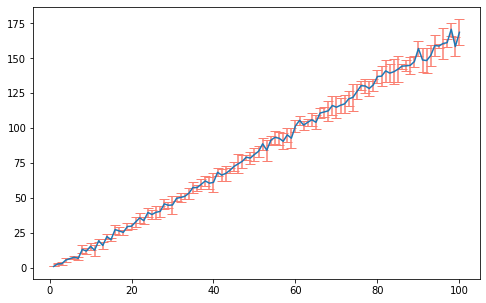

In [84]:
plt.figure(figsize = (8, 5))
plt.errorbar(N,avg0,yerr=std0,ecolor='salmon',capsize=5)
plt.savefig('perceptron(1)', bbox_inches = 'tight')
plt.show()

 
1.706 x - 3.306


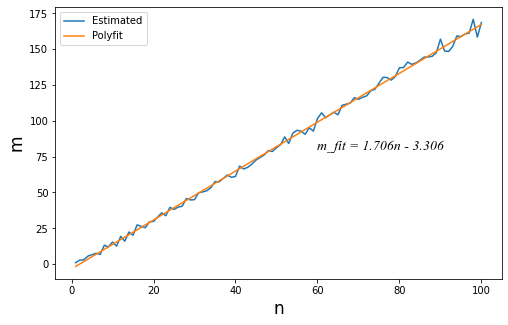

In [83]:
# fitted perceptron
c0 = np.polyfit(N, avg0, 1)
print(np.poly1d(c0))
plt.figure(figsize = (8, 5))
plt.plot(N, avg0, label='Estimated')
plt.plot(N, c0[0]*N+c0[1], label='Polyfit')
plt.xlabel('n', fontsize=17)
plt.ylabel('m', fontsize=17)
plt.legend()
text = 'm_fit = 1.706n - 3.306'
plt.text(60, 80, text, size=14, family="Times new roman", color="black", style='italic', weight = "light")
plt.savefig('perceptron(2)', bbox_inches = 'tight')
plt.show()

In [79]:
# winnow
N = range(1, 101)
s = 5000
I = 10
avg1, std1 = Sample_complexity(N,s,winnow,I)

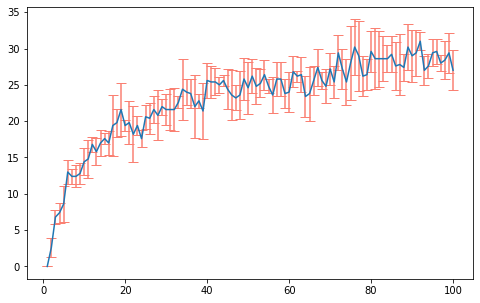

In [86]:
plt.figure(figsize = (8, 5))
plt.errorbar(N,avg1,yerr=std1,ecolor='salmon',capsize=5)
plt.savefig('winnow(1)', bbox_inches = 'tight')
plt.show()

 
6.398 x - 0.2258


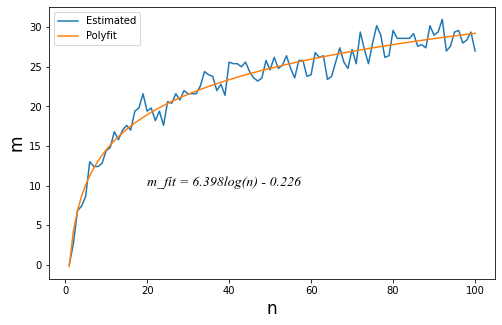

6.398481708684473log(n)-0.2257974122058386


In [167]:
# fitted winnow
c1 = np.polyfit(np.log(N), avg1, 1)
print(np.poly1d(c1)) # x = log(n)
plt.figure(figsize = (8, 5))
plt.plot(N, avg1, label='Estimated')
plt.plot(N, c1[0]*np.log(N)+c1[1], label='Polyfit')
plt.xlabel('n', fontsize=17)
plt.ylabel('m', fontsize=17)
plt.legend()
text = 'm_fit = 6.398log(n) - 0.226'
plt.text(20, 10, text, size=14, family="Times new roman", color="black", style='italic', weight = "light")
plt.savefig('winnow(2)', bbox_inches = 'tight')
plt.show()
print(str(c1[0])+'log(n)'+str(c1[1]))

In [89]:
# least_squares
N = range(1, 101)
s = 5000
I = 10
avg2, std2 = Sample_complexity(N,s,least_squares,I)

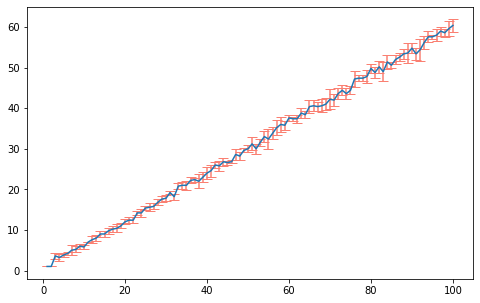

In [90]:
plt.figure(figsize = (8, 5))
plt.errorbar(N,avg2,yerr=std2,ecolor='salmon',capsize=5)
plt.savefig('least_squares(1)', bbox_inches = 'tight')
plt.show()

 
0.6015 x + 0.1691


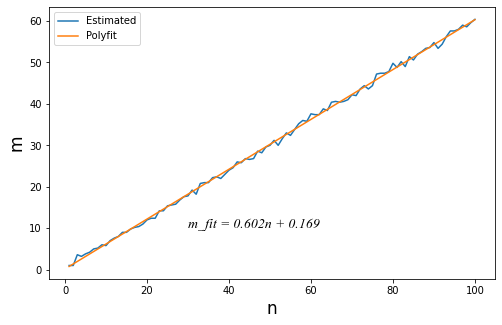

In [168]:
# fitted least_squares
c2 = np.polyfit(N, avg2, 1)
print(np.poly1d(c2)) # x = n
plt.figure(figsize = (8, 5))
plt.plot(N, avg2, label='Estimated')
plt.plot(N, c2[0]*N+c2[1], label='Polyfit')
plt.xlabel('n', fontsize=17)
plt.ylabel('m', fontsize=17)
plt.legend()
text = 'm_fit = 0.602n + 0.169'
plt.text(30, 10, text, size=14, family="Times new roman", color="black", style='italic', weight = "light")
plt.savefig('least_squares(2)', bbox_inches = 'tight')
plt.show()

In [141]:
# one_NN
N = range(1, 16)
s = 2000
I = 5
avg3, std3 = Sample_complexity(N,s,one_NN,I)

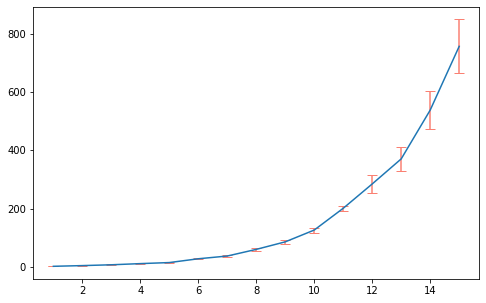

In [142]:
plt.figure(figsize = (8, 5))
plt.errorbar(N,avg3,yerr=std3,ecolor='salmon',capsize=5)
plt.savefig('one_NN(1)', bbox_inches = 'tight')
plt.show()

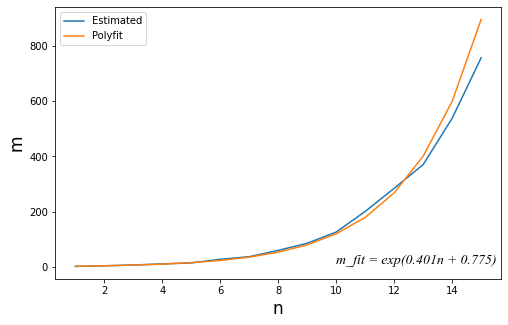

exp(0.401405698389458*n + 0.7750660822994556)


In [165]:
# fitted one_NN
c3 = np.polyfit(N, np.log(avg3), 1)
plt.figure(figsize = (8, 5))
plt.plot(N, avg3, label='Estimated')
plt.plot(N,np.exp(c3[0]*N+c3[1]) , label='Polyfit')
plt.xlabel('n', fontsize=17)
plt.ylabel('m', fontsize=17)
plt.legend()
text = 'm_fit = exp(0.401n + 0.775)'
plt.text(10, 12, text, size=14, family="Times new roman", color="black", style='italic', weight = "light")
plt.savefig('one_NN(2)', bbox_inches = 'tight')
plt.show()
print('exp('+str(c3[0])+'*n + '+str(c3[1])+')')